https://github.com/fwesel/T-KRR/tree/main/uci 

https://blink1073.github.io/oct2py/

# Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
N = 1e3
D = 2
cols = ['x' + str(i) for i in range(1, D + 1)]
np.random.seed(42)
x = np.random.uniform(size=(int(N), D))

## Non-separable

In [23]:
def nonsep1(x_arr):
    return np.sin(x_arr.prod())

df1 = pd.DataFrame(x, columns=cols)
df1['y'] = df1.apply(nonsep1, axis=1)
df1.head()

,x1,x2,y
0,0.374540,0.950714,0.348603
1,0.731994,0.598658,0.424323
2,0.156019,0.155995,0.024336
3,0.058084,0.866176,0.050289
4,0.601115,0.708073,0.412897


In [26]:
df1.to_csv('T-KRR/nonsep1_data.dat', index=False, header=False)

In [27]:
def nonsep2(x_arr):
    return np.sum(x_arr)

df2 = df1.copy(deep=True)
df2['y'] = df2[cols].apply(nonsep2, axis=1)
df2.head()

,x1,x2,y
0,0.374540,0.950714,1.325254
1,0.731994,0.598658,1.330652
2,0.156019,0.155995,0.312013
3,0.058084,0.866176,0.924260
4,0.601115,0.708073,1.309188


In [28]:
df2.to_csv('T-KRR/nonsep2_data.dat', index=False, header=False)

In [29]:
def nonsep3(x_arr):
    split = D // 2
    numer = x_arr[:split].prod() ** 1.5
    denom = (x_arr[:split].prod() ** 0.5) + (x_arr[split:].sum() ** 4)
    return numer / denom

df3 = df1.copy(deep=True)
df3['y'] = df3[cols].apply(nonsep3, axis=1)
df3.head()

,x1,x2,y
0,0.374540,0.950714,0.160409
1,0.731994,0.598658,0.636445
2,0.156019,0.155995,0.155785
3,0.058084,0.866176,0.017413
4,0.601115,0.708073,0.453941


In [30]:
df3.to_csv('T-KRR/nonsep3_data.dat', index=False, header=False)

In [31]:
def nonsep4(x_arr):
    split = D // 2
    term1 = x_arr[:split].sum() ** 1.5
    term2 = (x_arr[:split].prod() ** 2) * np.sin(x_arr[split:].sum() ** -2)
    return term1 + term2

df4 = df1.copy(deep=True)
df4['y'] = df1[cols].apply(nonsep4, axis=1)
df4.head()

,x1,x2,y
0,0.374540,0.950714,0.354639
1,0.731994,0.598658,0.810679
2,0.156019,0.155995,0.055520
3,0.058084,0.866176,0.017277
4,0.601115,0.708073,0.795434


In [32]:
df4.to_csv('T-KRR/nonsep4_data.dat', index=False, header=False)

## Separable

In [33]:
def sep1(x_arr):
    return x_arr.prod() ** (1/5)

dg1 = df1.copy(deep=True)
dg1['y'] = df1[cols].apply(sep1, axis=1)
dg1.head()

,x1,x2,y
0,0.374540,0.950714,0.813410
1,0.731994,0.598658,0.847886
2,0.156019,0.155995,0.475617
3,0.058084,0.866176,0.549961
4,0.601115,0.708073,0.842960


In [42]:
dg1.to_csv('T-KRR/sep1_data.dat', index=False, header=False)

In [43]:
def sep2(x_arr):
    split = D // 2
    return x_arr[:split].prod() / x_arr[split:].prod()

dg2 = df1.copy(deep=True)
dg2['y'] = df1[cols].apply(sep2, axis=1)
dg2.head()

,x1,x2,x3,x4,x5,x6,y
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,17.889199
1,0.058084,0.866176,0.601115,0.708073,0.020584,0.969910,2.139282
2,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,1.097616
3,0.431945,0.291229,0.611853,0.139494,0.292145,0.366362,5.155218
4,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,5.052927


<BarContainer object of 40 artists>

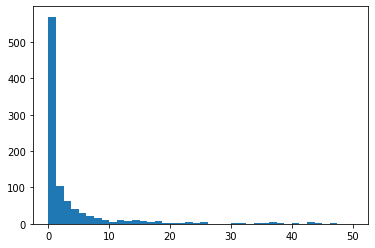

In [56]:
plt.hist(dg2['y'], bins=40, range=(0, 50))[2]

In [44]:
dg2.to_csv('T-KRR/sep2_data.dat', index=False, header=False)

In [62]:
def sep3(x_arr):
    return x_arr.prod() ** -1

dg3 = df1.copy(deep=True)
dg3['y'] = df1[cols].apply(sep3, axis=1)
dg3.head()

,x1,x2,x3,x4,x5,x6,y
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,263.317162
1,0.058084,0.866176,0.601115,0.708073,0.020584,0.969910,2339.016265
2,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,1062.612388
3,0.431945,0.291229,0.611853,0.139494,0.292145,0.366362,870.214706
4,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,988.334612


<BarContainer object of 40 artists>

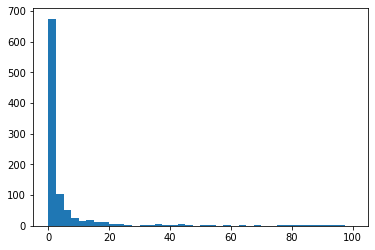

In [66]:
plt.hist(df1['y'], bins=40, range=(0, 100))[2]

In [67]:
dg3.to_csv('T-KRR/sep3_data.dat', index=False, header=False)

In [71]:
def sep4(x_arr):
    split = D // 2
    return (x_arr[:split].prod() ** 2) / (x_arr[split:].prod())

dg4 = df1.copy(deep=True)
dg4['y'] = df1[cols].apply(sep4, axis=1)
dg4.head()

,x1,x2,x3,x4,x5,x6,y
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,4.662800
1,0.058084,0.866176,0.601115,0.708073,0.020584,0.969910,0.064697
2,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.035277
3,0.431945,0.291229,0.611853,0.139494,0.292145,0.366362,0.396787
4,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,0.361296


In [79]:
dg4.to_csv('T-KRR/sep4_data.dat', index=False, header=False)

In [83]:
def sep5(x_arr):
    return np.exp(x_arr.sum())

dg5 = df1.copy(deep=True)
dg5['y'] = df1[cols].apply(sep5, axis=1)
dg5.head()

,x1,x2,x3,x4,x5,x6,y
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,19.451419
1,0.058084,0.866176,0.601115,0.708073,0.020584,0.969910,25.126968
2,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,9.384036
3,0.431945,0.291229,0.611853,0.139494,0.292145,0.366362,8.440381
4,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,13.383454


In [84]:
dg5.to_csv('T-KRR/sep5_data.dat', index=False, header=False)

In [81]:
def sep6(x_arr):
    return np.sin(x_arr.sum())

dg6 = df1.copy(deep=True)
dg6['y'] = df1[cols].apply(sep6, axis=1)
dg6.head()

,x1,x2,x3,x4,x5,x6,y
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.172801
1,0.058084,0.866176,0.601115,0.708073,0.020584,0.969910,-0.082256
2,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.784930
3,0.431945,0.291229,0.611853,0.139494,0.292145,0.366362,0.846068
4,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,0.520617


In [82]:
dg6.to_csv('T-KRR/sep6_data.dat', index=False, header=False)

In [85]:
def sep7(x_arr):
    split = D // 2
    return x_arr[:split].prod() * np.exp(x_arr[split:].sum())

dg7 = df1.copy(deep=True)
dg7['y'] = df1[cols].apply(sep7, axis=1)
dg7.head()

,x1,x2,x3,x4,x5,x6,y
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.647971
1,0.058084,0.866176,0.601115,0.708073,0.020584,0.969910,0.165309
2,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.088454
3,0.431945,0.291229,0.611853,0.139494,0.292145,0.366362,0.170953
4,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,0.226519


In [86]:
dg7.to_csv('T-KRR/sep7_data.dat', index=False, header=False)